* devo scaricare python 3.9
* se lo scarico ho poi un problema che pip non funziona
________

* devo far funzionare gli environment in VSC



In [ ]:
#check python version
!python --version

Python 3.7.13


In [ ]:
# #install python 3.9
# !sudo apt-get update -y
# !sudo apt-get install python3.9

# #change alternatives
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2

# #check python version
# !python --version

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [85.6 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2,302 kB]
Hit:14 http:/

In [ ]:
# pip install rasterio rioxarray swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 47 kB 2.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 658 kB 37.0 MB/s 
     |████████████████████████████████| 6.3 MB 39.8 MB/s 
     |████████████████████████████████| 281 kB 47.1 MB/s 
     |████████████████████████████████| 140 kB 63.5 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=ac8649a256e55691c01f9910daeda3c8b2ca7686f03aeee554544ad329c6bb75
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
  Created wheel for swifter: filename=swifter-1.2.0-py3-none-any.whl size=14498 sha256=31d2bf91cc8bbd6cebe5810ee34683a8ab2fd9c431438d450b01a131af332696
  Stored in di

In [ ]:
# pip install h3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 23.9 MB/s 


In [ ]:
# pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 11.8 MB/s 
     |████████████████████████████████| 16.7 MB 316 kB/s 


# Let's start

In [ ]:
import process_geotiff as pg

In [ ]:
import numpy as np
import pandas as pd
import h3.api.numpy_int as h3
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/DSSG (STC   UNICEF)/data'

In [ ]:
nga_clean = pd.read_table(path + '/clean/training_data/nga_clean_v1.csv', sep=',')
print('There are '+str(nga_clean.shape[0])+' hexagons')

There are 1358 hexagons


In [ ]:
tiff_dir = path 

In [ ]:
hex_codes = nga_clean['hex_code'].to_list()
# hex_codes

In [ ]:
dim_x = 32
dim_y = 32

In [ ]:
nga_clean['dep_sanitation_sev'].describe(percentiles=[0.20, 0.4,0.6,0.8,1])

count    1358.000000
mean        0.466817
std         0.382177
min         0.000000
20%         0.000000
40%         0.262907
50%         0.445626
60%         0.612849
80%         0.922838
100%        1.000000
max         1.000000
Name: dep_sanitation_sev, dtype: float64

(array([491., 145., 164., 155., 403.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

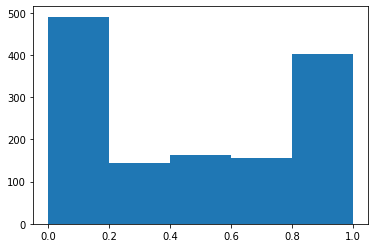

In [ ]:
plt.hist(nga_clean['dep_sanitation_sev'], bins=5)

In [ ]:
def categorical_quintile(x) -> int:
  if x <= 0.20:
    return 0
  elif (x <= 0.4) and (x > 0.2):
    return 1
  elif (x <= 0.6) and (x > 0.4):
    return 2
  elif (x <= 0.8) and (x > 0.6):
    return 3
  elif (x <= 1) and (x > 0.8):
    return 4
  
nga_clean['sanitation_5'] = nga_clean['dep_sanitation_sev'].apply(lambda x: categorical_quintile(x))

# Problems with Elevation and Precipitation

In [ ]:
images = pg.convert_tiffs_to_image_dataset(tiff_dir, hex_codes, dim_x=dim_x, dim_y=dim_y)

Overall, 25 bands found in datasets


Dataset progress::   0%|          | 0/9 [00:00<?, ?it/s]

Location progress::   0%|          | 0/1358 [00:00<?, ?it/s]

Location progress::   0%|          | 0/1358 [00:00<?, ?it/s]

Location progress::   0%|          | 0/1358 [00:00<?, ?it/s]

Location progress::   0%|          | 0/1358 [00:00<?, ?it/s]

Location progress::   0%|          | 0/1358 [00:00<?, ?it/s]

Location progress::   0%|          | 0/1358 [00:00<?, ?it/s]

Location progress::   0%|          | 0/1358 [00:00<?, ?it/s]

Location progress::   0%|          | 0/1358 [00:00<?, ?it/s]

Location progress::   0%|          | 0/1358 [00:00<?, ?it/s]

In [ ]:
images.shape

(1358, 25, 32, 32)

In [ ]:
sum(sum(sum(sum(np.isnan(images)))))

584522

# Replace NAs with dummy value [ASK ARPITA]

In [ ]:
images[np.isnan(images)] = -60

In [ ]:
print(np.min(images))
print(np.max(images))

-60.0
2665.98


# Data Structure

In [ ]:
# reshape data
data = images.reshape(images.shape[0], images.shape[2], images.shape[3], images.shape[1])
print(data.shape)

# data_3 = data[:,:,:,:3]
# print(data_3.shape)

(1358, 32, 32, 25)
(1358, 32, 32, 3)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, nga_clean['sanitation_5'], test_size=0.33, random_state=42)

In [ ]:
v_min = X_train.min(axis=(0, 1), keepdims=True)
v_max = X_train.max(axis=(0, 1), keepdims=True)
X_train_norm = (X_train - v_min)/(v_max - v_min)
X_test_norm = (X_test - v_min)/(v_max - v_min)

X_train_norm.shape

(909, 32, 32, 25)

In [ ]:
y_train.shape

(909,)

In [ ]:
num_classes = 5

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# convert class vectors to binary class matrices
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)


In [ ]:
y_train_onehot.shape

(909, 5)

In [ ]:
def plot_model(history):
    '''
    Plot the accuracy, loss and the learning rate
    ''' 

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

    # # summarize history for learning rate
    # plt.plot(history.history['lr'])
    # plt.plot(history.history['val_lr'])
    # plt.title('model learning rate')
    # plt.ylabel('learning rate')
    # plt.xlabel('epoch')
    # plt.legend(['train', 'test'], loc='best')
    # plt.show()

# Fine Tuning 

TO DO:
1. include initial layer to transform 25 channels into 3
2. extract 100 features
3. add callbacks
4. get correct metric to measure the multiclass unbalanced output
5. replace NAs with a more appropriate value (check arpita's)
6. if I use categorical cross entropy, I shouldn't use the softmax right?



In [ ]:
# pip install tensorflow

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, Input, Lambda, GlobalAveragePooling2D


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_model = ResNet50(include_top=False, weights='imagenet', input_shape=(dim_x, dim_y, 3))

In [ ]:
# freeze feature layers 
for layer in resnet_model.layers:
    layer.trainable = False

In [ ]:
# # check if I froze them
# for i, layer in enumerate(resnet_model.layers):
#   print(i, layer.name, "-", layer.trainable)

In [ ]:
# model.summary()

In the output laye I start with 2048 features and I want to extract 100. I can do this adding a Dense layer with 100 features and with another dense with 5 (that is the multiclass output).

* pooling? 

In [ ]:
model = Sequential()
# From 25 channels to 3
model.add(Conv2D(3, 3, padding='same'))
# Resnet Model
model.add(resnet_model)
# flatten and add output layer
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(100, activation='relu', name='layer_per_FE'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation = 'softmax'))

In [ ]:
checkpoint_filepath = 'resnet_feature_extraction'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

Add OPTIMIZER and ACCURACY suitable for not balanced.

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
optimizer = Adam(lr=0.00001)

model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 3)         678       
                                                                 
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_10 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 layer_per_FE (Dense)        (None, 100)               204900    
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                      

In [ ]:
print(X_train_norm.shape)
print(y_train_onehot.shape)

(909, 32, 32, 25)
(909, 5)


In [ ]:
history = model.fit(X_train_norm, y_train_onehot,
                    batch_size = 8,
                    epochs= 5,
                    callbacks = [model_checkpoint_callback],
                    verbose=1,
                    validation_data = (X_test_norm, y_test_onehot))

Epoch 1/5
114/114 [==============================] - 106s 728ms/step - loss: 1.9625 - accuracy: 0.2101 - val_loss: 1.5967 - val_accuracy: 0.2895
Epoch 2/5
114/114 [==============================] - 66s 580ms/step - loss: 1.9125 - accuracy: 0.2420 - val_loss: 1.6005 - val_accuracy: 0.2873
Epoch 3/5
114/114 [==============================] - 83s 731ms/step - loss: 1.9167 - accuracy: 0.2266 - val_loss: 1.5926 - val_accuracy: 0.3051
Epoch 4/5
114/114 [==============================] - 89s 784ms/step - loss: 1.8890 - accuracy: 0.2288 - val_loss: 1.5885 - val_accuracy: 0.3118
Epoch 5/5
114/114 [==============================] - 88s 775ms/step - loss: 1.9128 - accuracy: 0.2464 - val_loss: 1.5874 - val_accuracy: 0.3140


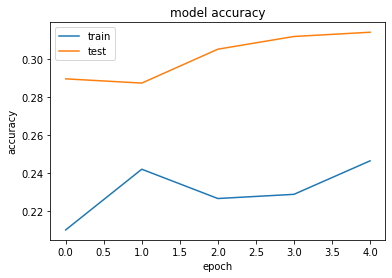

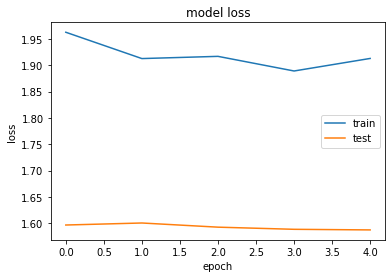

In [ ]:
plot_model(history)

In [ ]:
# Save best model
model.load_weights(checkpoint_filepath)


# Extract Features

https://stackoverflow.com/questions/48142181/whats-the-purpose-of-keras-backend-function

In [ ]:
from keras.models import Model

layer_name = 'layer_per_FE'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

# [TO DO] 
# I need to normalize the data before passing it to the 
# Need Normalized data as input
intermediate_output = intermediate_layer_model.predict(data)


In [ ]:
intermediate_output.shape

(1358, 100)

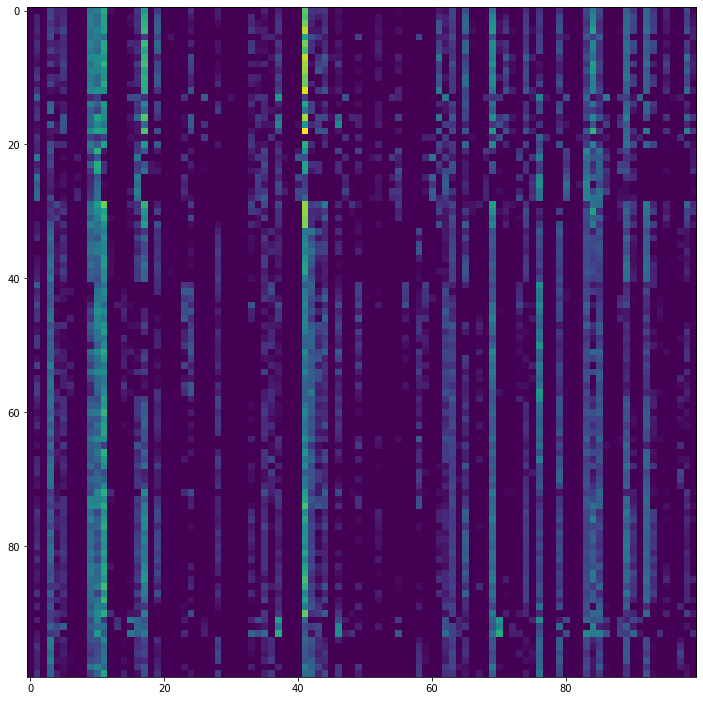

In [ ]:
plt.figure(figsize=(12,20))
plt.imshow(intermediate_output[:100,:])